# MESCAL 302: Segmented Colormap

A useful module to merge multiple linear segments into a single cohesive colormap.

## Introduction

Visualizing data with complex color scales can be challenging. Some datasets have natural break points where you want different color behavior:

- Extreme negative values in one color range
- Near-zero values with fine gradients
- Positive values in another color range
- Extreme positive values with distinct colors

Traditional linear colormaps don't handle these multi-segment needs well. The `SegmentedColorMap` and its companion `SegmentedColorMapLegend` solve this problem by allowing you to define custom segments with distinct color behaviors.

## Key Features

- Define different color gradients for different value ranges
- Seamless transitions between segments
- Support for both continuous gradients and discrete colors
- Integration with both Folium (via legend) and Plotly (via normalized colorscale)
- Configurable ticks, labels, and visual styling

## Creating a Market Price Colormap
Let's create a colormap for electricity market prices (€/MWh) with these segments:

- Extreme negative prices: -500 to -150 €/MWh (navy blue)
- Negative prices: -150 to 0 €/MWh (gradient from blue to light blue)
- Low positive prices: 0 to 150 €/MWh (gradient from light green to yellow-green)
- High positive prices: 150 to 500 €/MWh (gradient from yellow-green to orange)
- Extreme positive prices: 500 to 10000 €/MWh (red)

In [1]:
import os
import numpy as np
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
import io
from IPython.display import Image
from PIL import Image as PILImage

from mescal.visualizations.styling.segmented_colormap import SegmentedColorMap, SegmentedColorMapLegend

# Directory setup
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
export_folder = 'studies/study_01_intro_to_mescal/non_versioned/output'
os.makedirs(export_folder, exist_ok=True)

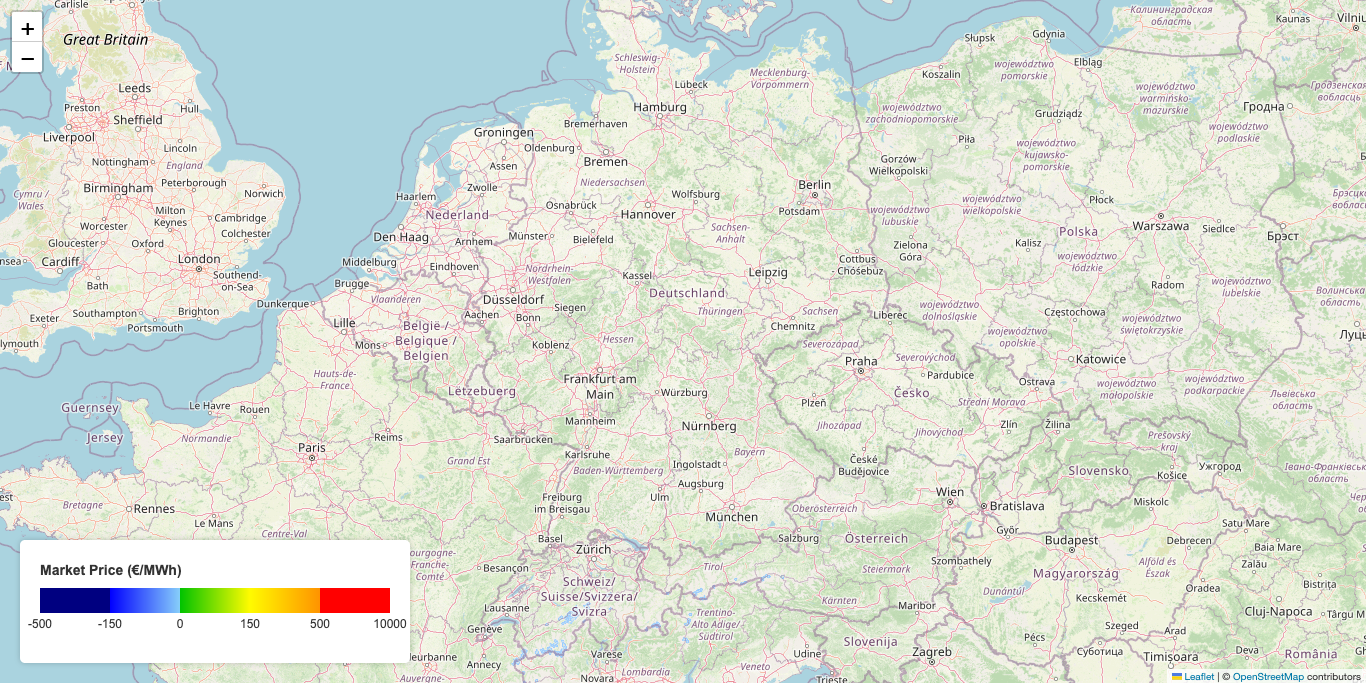

In [2]:
from mescal.utils.plotly_utils.plotly_theme import colors

# Define our market price colormap segments
price_segments = {
    (-500, -150): ['#000080'],  # Navy for extreme negative prices
    (-150, 0): ['#0000FF', '#87CEFA'],  # Blue to light blue for negative prices
    (0, 150): ['#00C300', '#FFFB00'],  # Light green to yellow-green for low positive prices
    (150, 500): ['#FFFB00', '#FF9300'],  # Yellow-green to orange for high positive prices
    (500, 10000): ['#FF0000']  # Red for extreme positive prices
}

# Create a colormap without folium legend functionality 
price_colormap = SegmentedColorMap(price_segments)

# Create a legend for Folium maps
price_legend = SegmentedColorMapLegend(
    segments=price_segments,
    title="Market Price (€/MWh)",
    width=350,
    bar_height=25,
    total_height=55,
    padding=20,
    background_color="#FFFFFF",
    n_ticks_per_segment=2
)

# Show the legend in a Folium map
m = folium.Map(location=[50.5, 10.5], zoom_start=6)
price_legend.add_to(m)


# Save and display the image
image_path = os.path.join(export_folder, 'segmented_colormap_folium.png')
img_data = m._to_png(5)  # 5 second delay to ensure everything renders
img = PILImage.open(io.BytesIO(img_data))
img.save(image_path)
Image(image_path)

# Use this instead when you are running locally and want to view the interactive html inside the notebook
# m

This legend will be used in the next notebook (mescal_303_geospatial_visualization.ipynb) for our geospatial visualizations of market prices.

## Using the Colormap with Plotly
The `to_normalized_colorscale()` method converts our segmented colormap to a format compatible with Plotly:

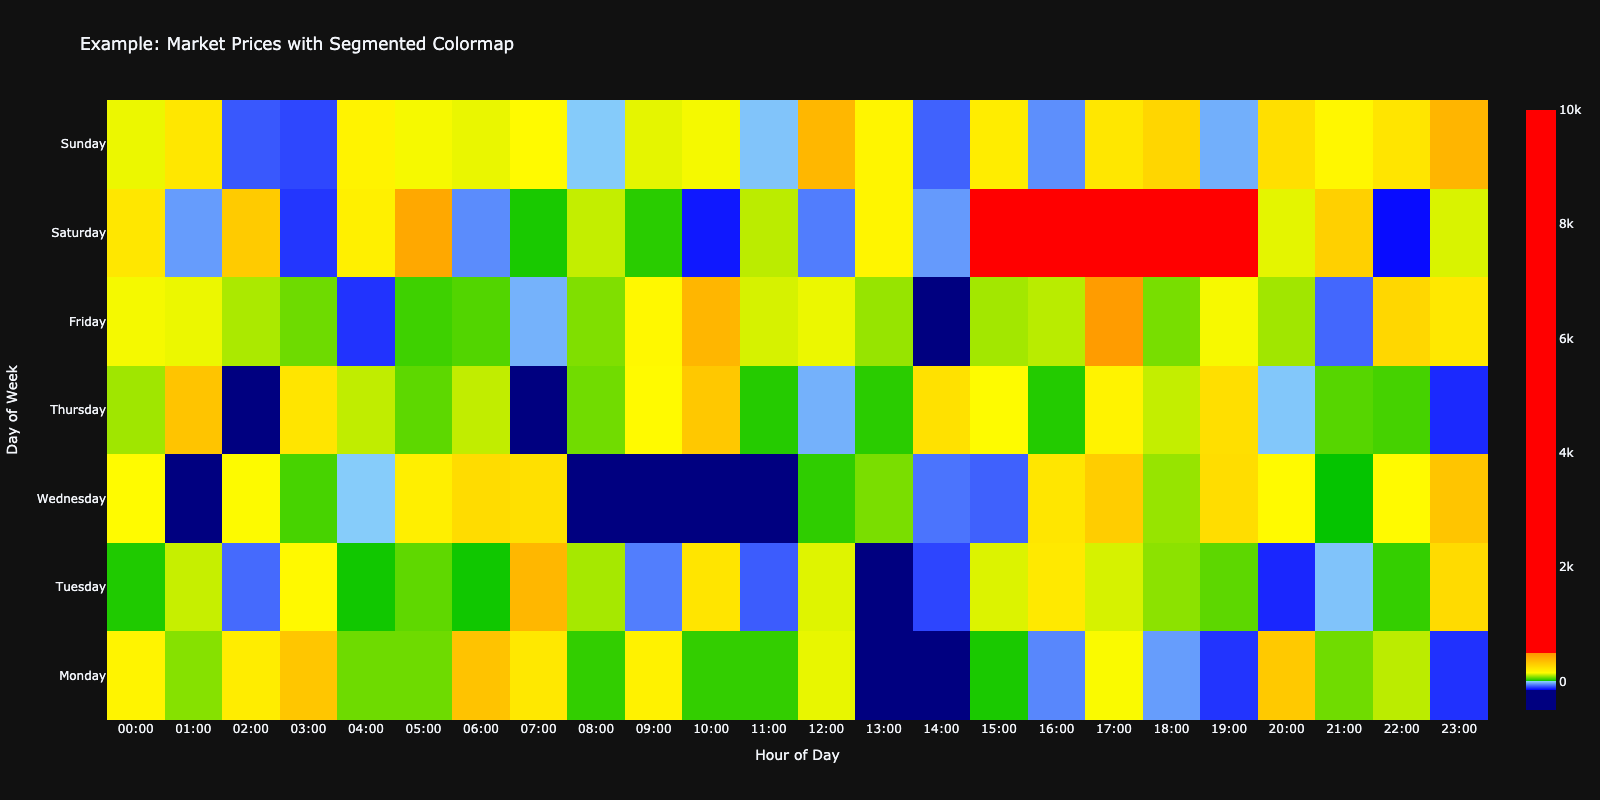

In [3]:
# Get the colorscale for Plotly
plotly_colorscale = price_colormap.to_normalized_colorscale(num_reference_points_per_segment=5)

# Create some sample data with a range of price values
np.random.seed(42)
hours = 24
days = 7
z = np.random.normal(loc=100, scale=150, size=(days, hours))
z[2, 8:12] = -200  # Add some extreme negative values
z[5, 15:20] = 700  # Add some extreme positive values

# Create a heatmap with our custom colorscale
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=[f"{h:02d}:00" for h in range(hours)],
    y=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    colorscale=plotly_colorscale,
    zmin=-500,
    zmax=10000,
))

fig.update_layout(
    title="Example: Market Prices with Segmented Colormap",
    xaxis_title="Hour of Day",
    yaxis_title="Day of Week",
)

# Save and display the image
image_path = os.path.join(export_folder, 'segmented_colormap_plotly.png')
fig.update_layout(height=800, width=1600)
fig.write_image(image_path)
Image(image_path)

# Use this instead when you are running locally and want to view in your browser
# fig.show(renderer='browser')

## Benefit of Segmented Colormaps

With our segmented colormap, we can:

1. Define a color scale split in custom segments
2. Assign distinct colors to extreme values
3. Create fine color gradients for the most common value ranges
4. Use appropriate colors for different segments (e.g., red for extreme positive prices)
5. Maintain consistent coloring across different visualizations

This approach is particularly useful for electricity market data, where extreme prices are significant but rare, and the common price range needs detailed color differentiation.


## Conclusion

The `SegmentedColorMap` module provides a powerful tool for creating color scales that match the natural segments in your data. When combined with folium and plotly, it enables consistent, informative visualizations across different platforms and chart types.

In the next notebook (mescal_303), we'll apply this colormap to geospatial visualizations of electricity market data.